 # Car Evaluation Data Set 

**с помощью `Pandas` и `Scikit-learn` предсказать класс автомобиля**
**Данные представляют собой набор характеристик с 4 возможными классами**
#характеристики
- `buying` – покупаемость
- `maint` – стоимость обслуживания
- `doors` – кол-во дверей
- `persons` – кол-во людей в машине
- `lug_boot` – вместительность багажника
- `safety` – безопасность

In [1]:
#Подключение модулей
#numpy – матричные операции
#matplotlib – научная графика
#pandas – таблицы (DataFrame) для анализа данных
#scikit-learn – алгоритмы машинного обучения

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#считывание файла с данными по ссылке
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
data = pd.read_csv(url, sep = ',', engine='python')
data1 = pd.read_csv(url, sep = ',', engine='python')
#не подойдёт так как файл по ссылке не содержит названий столбцов, поэтому подправим
data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety","class"]
data1.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety","class"]
data1 = data.drop(('class'), axis = 1)

In [3]:
#тип data
type(data)

pandas.core.frame.DataFrame

In [4]:
#разные способы вывода данных
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [5]:
print(data)

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    med  unacc
1     vhigh  vhigh      2       2    small   high  unacc
2     vhigh  vhigh      2       2      med    low  unacc
3     vhigh  vhigh      2       2      med    med  unacc
4     vhigh  vhigh      2       2      med   high  unacc
5     vhigh  vhigh      2       2      big    low  unacc
6     vhigh  vhigh      2       2      big    med  unacc
7     vhigh  vhigh      2       2      big   high  unacc
8     vhigh  vhigh      2       4    small    low  unacc
9     vhigh  vhigh      2       4    small    med  unacc
10    vhigh  vhigh      2       4    small   high  unacc
11    vhigh  vhigh      2       4      med    low  unacc
12    vhigh  vhigh      2       4      med    med  unacc
13    vhigh  vhigh      2       4      med   high  unacc
14    vhigh  vhigh      2       4      big    low  unacc
15    vhigh  vhigh      2       4      big    med  unacc
16    vhigh  vhigh      2      

In [6]:
#первые 5 машин
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
#последние 5 машин
data.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [8]:
#размер таблицы/название столбцов
print(data.shape)
print(data.columns)

(1727, 7)
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


- `buying` – покупаемость (categorical: "vhigh", "high", "med", "low")
- `maint` – стоимость обслуживания (categorical: "vhigh", "high", "med", "low")
- `doors` – кол-во дверей (categorical: "2", "3", "4", "5more") 
- `persons` – кол-во людей в машине (categorical: "2", "4", "more")
- `lug_boot` – вместительность багажника (categorical: "small", "med", "big") 
- `safety` – безопасность (categorical: "low", "med", "high")
- `class` – класс (categorical: "unacc", "acc", "good", "vgood")

In [9]:
#идексы строк
data.index

RangeIndex(start=0, stop=1727, step=1)

In [10]:
#столбец 'maint', 3 строка
data.at[3, 'maint']

'vhigh'

In [11]:
#столбец 'safety'
data['safety']

0        med
1       high
2        low
3        med
4       high
5        low
6        med
7       high
8        low
9        med
10      high
11       low
12       med
13      high
14       low
15       med
16      high
17       low
18       med
19      high
20       low
21       med
22      high
23       low
24       med
25      high
26       low
27       med
28      high
29       low
        ... 
1697     low
1698     med
1699    high
1700     low
1701     med
1702    high
1703     low
1704     med
1705    high
1706     low
1707     med
1708    high
1709     low
1710     med
1711    high
1712     low
1713     med
1714    high
1715     low
1716     med
1717    high
1718     low
1719     med
1720    high
1721     low
1722     med
1723    high
1724     low
1725     med
1726    high
Name: safety, Length: 1727, dtype: object

In [12]:
data['safety'][3]

'med'

In [13]:
#типы данных data['safety']
data['safety'].dtype.name

'object'

In [14]:
#типы данных data['persons']
data['persons'].dtype.name

'object'

In [15]:
type(data['persons'][3])

str

In [16]:
data[['doors', 'persons']].head()

,doors,persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


In [17]:
#информация о признаках
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,4,big,high,unacc
freq,432,432,432,576,576,576,1209


In [18]:
#Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму,
#а для каждой пары таких переменных – диаграмму рассеяния
#alpha : float, optional amount of transparency applied
#figsize : (float,float), optional     a tuple (width, height) in inches
#Но в моём datset нет кол-венных характеристик
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

In [19]:
#матрица корреляции также не работает для категориальных признаков
data.corr()

""


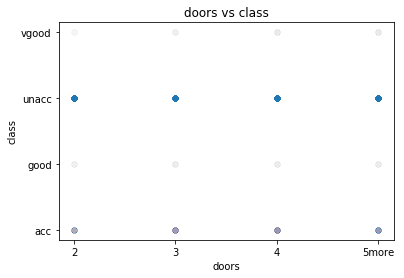

In [20]:
plt.plot(data['doors'], data['class'], 'o', alpha = 0.005)
plt.xlabel('doors')
plt.ylabel('class')
plt.title('doors vs class')
pass

In [21]:
data['class'] == 'vgood'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1697    False
1698    False
1699     True
1700    False
1701    False
1702    False
1703    False
1704    False
1705    False
1706    False
1707    False
1708    False
1709    False
1710    False
1711    False
1712    False
1713    False
1714     True
1715    False
1716    False
1717     True
1718    False
1719    False
1720    False
1721    False
1722    False
1723     True
1724    False
1725    False
1726     True
Name: class, Length: 1727, dtype: bool

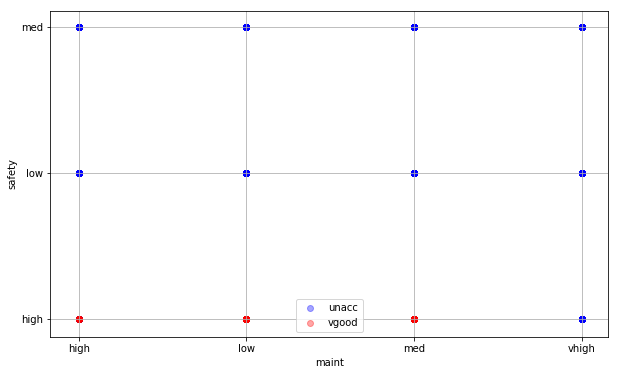

In [22]:
#зависимость стоимости обслуживания и безопасности
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 'unacc']['maint'],
            data[data['class'] ==  'unacc']['safety'],
            alpha = 0.35,
            label = 'unacc',
            color = 'b')

plt.scatter(data[data['class'] == 'vgood']['maint'],
            data[data['class'] == 'vgood']['safety'],
            alpha = 0.35,
            label = 'vgood',
            color = 'r')

plt.xlabel('maint')
#plt.xlim(0, 230)
#plt.ylim(0, 9)
plt.ylabel('safety')
plt.legend()
plt.grid()


In [23]:
data.describe(include = 'all')

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,4,big,high,unacc
freq,432,432,432,576,576,576,1209


In [24]:
#уникальные значения maint
data['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [25]:
#уникальные значения class
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [26]:
# вывод всех комбинций значений столбца 'maint' и 'class' присутствующих в таблице
for name in data['class'].unique():
    print(name, data['maint'][data['class'] == name].iloc[0])

unacc vhigh
acc med
vgood med
good low


# Готовим данные

In [27]:
#так как все данные категориальные 

categorical_columns = [c for c in data1.columns if data1[c].dtype.name == 'object']
numerical_columns   = [c for c in data1.columns if data1[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
[]


In [28]:
for c in categorical_columns:
    print(c, data1[c].unique())

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
persons ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['med' 'high' 'low']


In [29]:
#Обрабатываем пропущенные значения

#Если данные содержат пропущенные значения, то имеется две простые альтернативы:

 #   удалить столбцы с такими значениями (data = data.dropna(axis = 1)),
  #  удалить строки с такими значениями (data = data.dropna(axis = 0)).

#После этого данных может стать совсем мало.

#Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.
#перечисленные ниже действия можно не выполнять, т.к. пропущенных данных нет

In [30]:
data[categorical_columns].count(axis = 0)# пропущенных нет

buying      1727
maint       1727
doors       1727
persons     1727
lug_boot    1727
safety      1727
dtype: int64

In [31]:
#следовательно ничего не заполняем
data_describe = data.describe(include = [object])

In [32]:
data.describe(include = [object])

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,4,big,high,unacc
freq,432,432,432,576,576,576,1209


In [33]:
#Векторизация

In [34]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']


In [35]:
#если бы были бинарные признаки 
#data.at[data['sex'] == 'Male', 'sex'] = 0
#data.at[data['sex'] == 'Female', 'sex'] = 1
#data['sex'].describe()

In [36]:
#К небинарными признакам применим метод векторизации, который заключается в следующем.

#Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

#Например, в нашей задаче признак marital принимает 4 различных значений:

In [37]:
data['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [38]:
#Заменим признак buying признаками: vhigh, high .... .

 #   Если признак buying принимает значение high, то признак high равен 1, а все остальные равны 0.
  #  и т.д.
   # Но перед этим изменим значения vhigh на vhigh0,vhigh1,... , т.к. оно встречается в нескольких столбцах(аналогично и с другими признаками)

#Такую векторизацию осуществляет в pandas метод get_dummies:

In [39]:
i=0;
for c in nonbinary_columns:
    data1.at[data1[c] == 'vhigh', c] = 'vhigh'+str(i)
    data1.at[data1[c] == 'high', c] = 'high'+str(i)
    data1.at[data1[c] == 'med', c] = 'med'+str(i)
    data1.at[data1[c] == 'low', c] = 'low'+str(i)
    data1.at[data1[c] == '2', c] = 'two'+str(i)
    data1.at[data1[c] == '4', c] = 'for'+str(i)
    i=i+1

In [40]:

for c in nonbinary_columns:
    print(c, data1[c].unique())

buying ['vhigh0' 'high0' 'med0' 'low0']
maint ['vhigh1' 'high1' 'med1' 'low1']
doors ['two2' '3' 'for2' '5more']
persons ['two3' 'for3' 'more']
lug_boot ['small' 'med4' 'big']
safety ['med5' 'high5' 'low5']


In [41]:
data_nonbinary = pd.get_dummies(data1[nonbinary_columns])
print(data_nonbinary.columns)

Index(['buying_high0', 'buying_low0', 'buying_med0', 'buying_vhigh0',
       'maint_high1', 'maint_low1', 'maint_med1', 'maint_vhigh1', 'doors_3',
       'doors_5more', 'doors_for2', 'doors_two2', 'persons_for3',
       'persons_more', 'persons_two3', 'lug_boot_big', 'lug_boot_med4',
       'lug_boot_small', 'safety_high5', 'safety_low5', 'safety_med5'],
      dtype='object')


# Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:
но в данной задаче таких нет

In [42]:
#Соединяем все в одну таблицу

In [43]:
data1 = data_nonbinary
print(data1.shape)

(1727, 21)


In [44]:
data1.describe()

,buying_high0,buying_low0,buying_med0,buying_vhigh0,maint_high1,maint_low1,maint_med1,maint_vhigh1,doors_3,doors_5more,...,doors_two2,persons_for3,persons_more,persons_two3,lug_boot_big,lug_boot_med4,lug_boot_small,safety_high5,safety_low5,safety_med5
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,...,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,0.250145,0.250145,0.250145,0.249566,0.250145,0.250145,0.250145,0.249566,0.250145,0.250145,...,0.249566,0.333526,0.333526,0.332947,0.333526,0.333526,0.332947,0.333526,0.332947,0.333526
std,0.433222,0.433222,0.433222,0.432887,0.433222,0.433222,0.433222,0.432887,0.433222,0.433222,...,0.432887,0.471609,0.471609,0.471404,0.471609,0.471609,0.471404,0.471609,0.471404,0.471609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X = data1
y = data['class']
feature_names = X.columns

In [46]:
type(feature_names)

pandas.core.indexes.base.Index

In [47]:
feature_names

Index(['buying_high0', 'buying_low0', 'buying_med0', 'buying_vhigh0',
       'maint_high1', 'maint_low1', 'maint_med1', 'maint_vhigh1', 'doors_3',
       'doors_5more', 'doors_for2', 'doors_two2', 'persons_for3',
       'persons_more', 'persons_two3', 'lug_boot_big', 'lug_boot_med4',
       'lug_boot_small', 'safety_high5', 'safety_low5', 'safety_med5'],
      dtype='object')

In [48]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1727, 21)
(1727,)


In [49]:
type(X)

pandas.core.frame.DataFrame

In [50]:
type(y)

pandas.core.series.Series

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1208 519


In [52]:
1208+519

1727

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [54]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [55]:

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0355960264901 0.0828516377649


In [56]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [57]:
err_test

0.08285163776493254

In [58]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[104   1  13   0]
 [ 14   3   0   0]
 [  6   0 355   0]
 [  7   2   0  14]]


In [59]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

In [60]:
# Долго!
from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0860927152318 8


In [61]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0413907284768 0.0886319845857


# задание 2

In [62]:
from sklearn.neural_network import MLPClassifier

In [63]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [64]:
#проверим качество 
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [65]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0250481695568


In [66]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

1.0 0.974951830443


In [67]:
print(1 - mlp_model.score(X_test, y_test))

0.0250481695568


In [68]:
#Подбор оптимального значения параметра регуляризации
alpha_arr = np.logspace(-10,1, 100)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

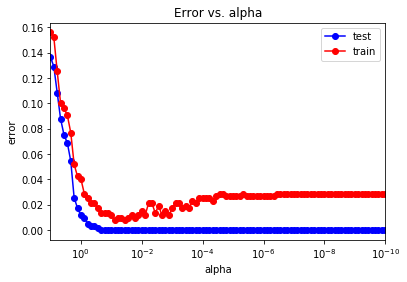

In [69]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [70]:
#Минимальное значение ошибки:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.00770712909441


In [71]:
#Оптимальное значение alpha:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.03593814  0.07742637]


In [73]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.00770712909441


In [74]:
#переобучение наблюдается при aльфа больше 0.07

# Задача 3

In [75]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.0423892100193


In [76]:
#Так как ошибка на тестовой выборке больше, наблюдается переобучение

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

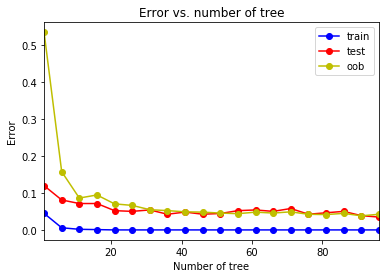

In [77]:
#графики зависимости ошибки на тестовой и обучающей выборках и oob-ошибки от количества деревьев
#oob_score - Whether to use out-of-bag samples to estimate the generalization accuracy. => True
tree_arr = np.arange(1, 100, 5)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree,oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1-rf.oob_score_)
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of tree')
plt.xlabel('Number of tree')
plt.ylabel('Error')
plt.legend()    
pass

In [78]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print( min_train_err)
print( min_test_err)

0.0
0.0346820809249


In [79]:
#Оптимальное число деревьев 
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[96]


In [80]:
#Оптимальное число деревьев 36

In [81]:
#отметим, что если мы не устанавливаем ограничение на высоту деревьев(max_depth),
#то будем наблюдать переобучение при любом кол-ве деревьев
tree_arr = np.arange(1, 100, 5)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree,oob_score = True, max_depth=5)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1-rf.oob_score_)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

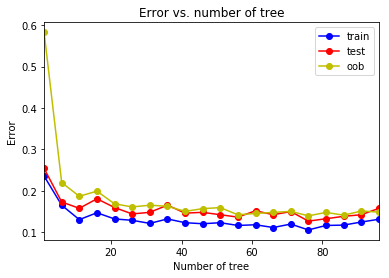

In [82]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of tree')
plt.xlabel('Number of tree')
plt.ylabel('Error')
plt.legend()
pass

In [83]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print( min_train_err)
print( min_test_err)

0.105960264901
0.127167630058


In [84]:
#Оптимальное число деревьев 
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[76]


# Extremely Random Forest

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
test_err = []
train_err = []
oob_err = []

n_estimators = range(1, 21, 1)
for n in n_estimators:
    erf_model = ExtraTreesClassifier(n_estimators = n, oob_score = True, bootstrap = True)
    erf_model.fit(X, y)
    
    y_train_pred = erf_model.predict(X_train)
    y_test_pred = erf_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - erf_model.oob_score_)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

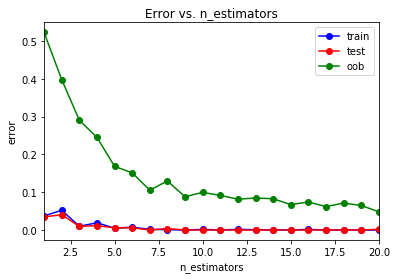

In [86]:
plt.plot(n_estimators, train_err, 'b-o', label = 'train')
plt.plot(n_estimators, test_err, 'r-o', label = 'test')
plt.plot(n_estimators, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(n_estimators), np.max(n_estimators)])
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

In [87]:
#удаётся достичь 0 ошибки в тестовой выборке

In [88]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


In [89]:
for i in range(len(test_err)):
    if((test_err[i] == min_test_err) and (train_err[i] == min_train_err)):
        n_estimator_opt = n_estimators[i]
        break
print(n_estimator_opt)

9


In [90]:
#достаточно 12 деревьев

# AdaBoost

In [91]:
from sklearn.ensemble import AdaBoostClassifier
test_err = []
train_err = []

n_estimators = range(1, 50, 1)
for n in n_estimators:
    ada_model = AdaBoostClassifier(n_estimators = n)
    ada_model.fit(X, y)
    
    y_train_pred = ada_model.predict(X_train)
    y_test_pred = ada_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

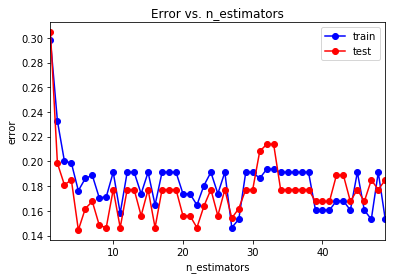

In [92]:
plt.plot(n_estimators, train_err, 'b-o', label = 'train')
plt.plot(n_estimators, test_err, 'r-o', label = 'test')
plt.xlim([np.min(n_estimators), np.max(n_estimators)])
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

In [93]:
#наблюдается недообучение почти при любых значениях кол-ва деревьев но есть также точки в которых наблюдается переобучение. Оптимальные значения ошибок достигаются в локальных минимумах.

In [94]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.146523178808 0.14450867052


In [95]:
for i in range(len(test_err)):
    if((test_err[i] == min_test_err) and (train_err[i] == min_train_err)):
        n_estimator_opt = n_estimators[i]
        break
print(n_estimator_opt)

9


# Gradient Boosted Trees

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
test_err = []
train_err = []

n_estimators = range(1, 1000, 20)
for n in n_estimators:
    gbt_model = GradientBoostingClassifier(n_estimators = n)
    gbt_model.fit(X, y)
    
    y_train_pred = gbt_model.predict(X_train)
    y_test_pred = gbt_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

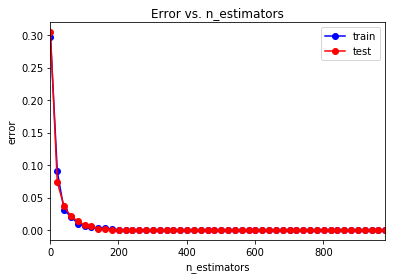

In [97]:
plt.plot(n_estimators, train_err, 'b-o', label = 'train')
plt.plot(n_estimators, test_err, 'r-o', label = 'test')
plt.xlim([np.min(n_estimators), np.max(n_estimators)])
plt.title('Error vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
pass

In [98]:
#Снижение ошибки здесь происходит только через некоторое количество деревьев, причём достаточно равномерно
#Так или иначе в кончном итоге все значения ошибок достигают нулевого уровня на количестве деревьев равном 181.

In [99]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


In [100]:
for i in range(len(test_err)):
    if((test_err[i] == min_test_err) and (train_err[i] == min_train_err)):
        n_estimator_opt = n_estimators[i]
        break
print(n_estimator_opt)

201


Данную задачу успешно решают с выходом на нулевой уровень ошибки на тестовых данных алгоритмы
Exremely Random Forest и Gradient Boosted Trees. AdaBoost и Random Forest не достигат таких уровней ошибок.

# Задача 4

In [101]:
#готовим классификатор
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha = 0.17782794, hidden_layer_sizes = (6, 6),
                    solver = 'lbfgs', activation = 'logistic', random_state = 42)

In [102]:
X1=X

In [103]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 10 ,svd_solver='full')
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [104]:
small_data = pca.transform(X)

In [105]:
print(X.shape)
print(small_data.shape)

(1727, 21)
(1727, 10)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(small_data, y, test_size = 0.33, random_state = 42)

In [107]:
mlp.fit(X_train, y_train)
print('big data train error:', np.mean(y_train != mlp.predict(X_train)))
print('big data test error:', np.mean(y_test != mlp.predict(X_test)))
mlp.fit(X_train_small, y_train_small)
print('small data train error:', np.mean(y_train_small != mlp.predict(X_train_small)))
print('small data test error:', np.mean(y_test_small != mlp.predict(X_test_small)))

big data train error: 0.0
big data test error: 0.0157894736842
small data train error: 0.0579083837511
small data test error: 0.115789473684


In [108]:
components = range(1, 21)
train_err = []
test_err = []
for comp in components:
    pca = PCA(n_components = comp, svd_solver = 'full')
    pca.fit(X)
    small_data = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(small_data, y, test_size = 0.33, random_state = 42)
    mlp.fit(X_train, y_train)
    train_err.append(np.mean(y_train != mlp.predict(X_train)))
    test_err.append(np.mean(y_test != mlp.predict(X_test)))

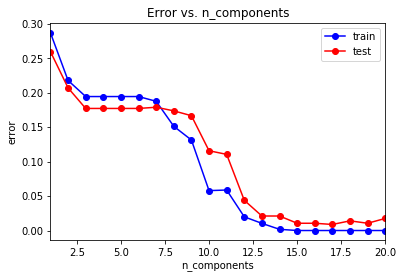

In [109]:
plt.plot(components, train_err, 'b-o', label = 'train')
plt.plot(components, test_err, 'r-o', label = 'test')
plt.xlim([np.min(components), np.max(components)])
plt.title('Error vs. n_components')
plt.xlabel('n_components')
plt.ylabel('error')
plt.legend()
pass

In [110]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.00877192982456


In [111]:
components_opt = []
for i in range(len(components)):
    if((test_err[i] == min_test_err) and (train_err[i] == min_train_err)):
        components_opt.append(components[i])
print(components_opt)

[17]


In [112]:
#удалось улучшить качество при использовании 17 компонент